In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
x1=np.array([8,4,5,3,2,1,0,-1,-3,-5,-6,-8])
x2=np.array([5,7,3,-1,5,-4,1,3,-6,-4,-6,-3])
x3=np.array([10,4,5,2,3,7,11,8,6,4,9,1])

In [3]:
data=pd.DataFrame({'x1':x1,'x2':x2,'x3':x3})
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

data=pd.DataFrame(scaled_data,columns=data.columns)
data

,x1,x2,x3
0,1.738857,1.137147,1.353826
1,0.869428,1.592006,-0.595683
2,1.086785,0.682288,-0.270765
3,0.652071,-0.227429,-1.245520
4,0.434714,1.137147,-0.920602
5,0.217357,-0.909718,0.379071
6,0.000000,0.227429,1.678744
7,-0.217357,0.682288,0.703989
8,-0.652071,-1.364576,0.054153
9,-1.086785,-0.909718,-0.595683


In [4]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pc=pca.fit_transform(data)

In [5]:
# non_model.ipynb에서 구한 new와 완전히 동일
df=pd.DataFrame(pc,columns=['one','two'])
df.head()

,one,two
0,2.262503,0.985314
1,1.585327,-0.990936
2,1.179321,-0.459816
3,0.063618,-1.170049
4,0.905744,-1.182459


iris 데이터를 활용해보기

In [6]:
from sklearn.datasets import load_iris

In [7]:
iris=load_iris()

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
data=pd.DataFrame(iris.data,columns=iris['feature_names'])
data['target']=iris.target

In [10]:
X=data.drop(['target'],axis=1)
y=data.target

X_scaled=scaler.fit_transform(X)
data=pd.DataFrame(X_scaled,columns=iris['feature_names'])

In [11]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [24]:
# pc: 2차원으로 반환된 값 4개 -> 2개의 feature
pca=PCA(n_components=2)
pc=pca.fit_transform(X_scaled)
pca_df=pd.DataFrame(pc,columns=['feature1','feature2'])
pca_df.head()

,feature1,feature2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [25]:
# 약 95퍼센트 설명 가능
sum(pca.explained_variance_ratio_)

0.9581320720000164

In [26]:
component_weights = pca.components_

for i, component in enumerate(component_weights):
    print(f"주성분 {i+1}의 특성 기여도:")
    for j, weight in enumerate(component):
        feature_name = iris.feature_names[j]
        print(f"{feature_name}: {np.abs(weight)}")

주성분 1의 특성 기여도:
sepal length (cm): 0.5210659146701196
sepal width (cm): 0.26934744250594345
petal length (cm): 0.5804130957962946
petal width (cm): 0.5648565357793611
주성분 2의 특성 기여도:
sepal length (cm): 0.3774176155645672
sepal width (cm): 0.9232956595407149
petal length (cm): 0.024491609085586785
petal width (cm): 0.06694198696805831


In [34]:
pca_df['y']=iris.target

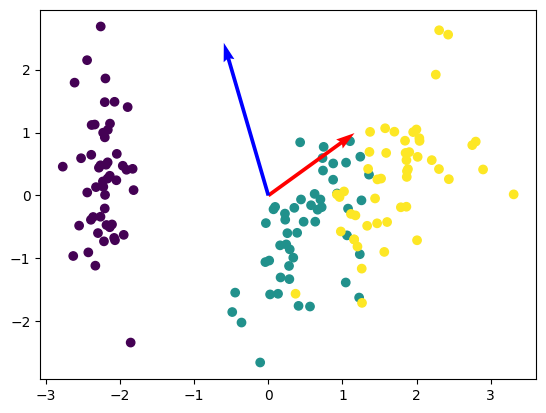

In [40]:
import matplotlib.pyplot as plt

plt.scatter(pca_df['feature1'],pca_df['feature2'],c=y)
origin = [0, 0]
plt.quiver(*origin, pca.components_[:, 0][0],pca.components_[:,0][1],color='r',scale=3)
plt.quiver(*origin, pca.components_[:, 1][0],pca.components_[:,1][1],color='b',scale=3)


plt.show()

In [18]:
# 1보다 큰 고유값이 피쳐 선택의 기준으로 간주됨
pca=PCA(n_components=4)
pca.fit_transform(X_scaled)
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])